In [33]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:

fle = "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/SonicationBehavior_HeavyLight/Bee31_19Oct2016_Hive3_W_S/2016_10_19__11_23_02/2016_10_19__11_23_51_424_220_450_test.txt"

# "/Users/cswitzer/Dropbox/SonicationBehavior/SonBehData/ExampleAccTrace.txt"
exx = np.transpose(pd.read_csv(fle, sep = " ", header = None))

In [52]:
exx.head()

,0,1
0,0.000000,-0.014654
1,0.000005,-0.015952
2,0.000010,-0.015628
3,0.000015,-0.014654
4,0.000020,-0.015303


In [53]:
len(exx)

20000

In [54]:
int(n/2)

10000

In [55]:

data = np.array(exx.loc[:,1])

log_rate = 200000.0

n =len(data) # length of the signal
k = np.arange(n, step = 1)
T = n/log_rate
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))] # one side frequency range

Y = np.fft.fft(data)/n # fft computing and normalization
Y = Y[range(int(n/2))]

# calculate top frequency
ind = np.argpartition(abs(Y), -4)[-4:]
# Find highest point on the spectrum
peakFrq = frq[ind[::-1]]
pwr = (abs(Y)[ind[::-1]])
domPK = [x for (y,x) in sorted(zip(pwr,peakFrq), reverse = True)][0]

beeFrqPwr = pwr[peakFrq == domPK]

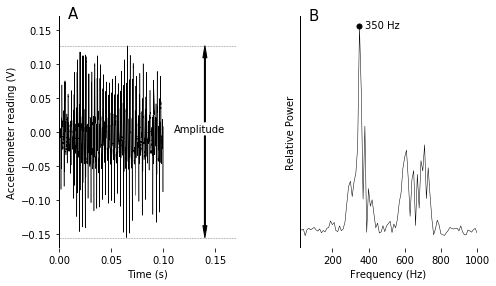

In [198]:
plt.figure(figsize=(7,4))

# create subplot 1
ax1 = plt.subplot(121)
ax1.plot(np.array(range(len(exx)))/ float(log_rate), data,color = 'black', linewidth=0.5 )
ax1.set_ylabel("Accelerometer reading (V)")
ax1.set_xlabel("Time (s)")
ax1.set_frame_on(False)
ax1.axhline(y=np.max(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.axhline(y=np.min(data), color='grey', linestyle='--', linewidth = 0.5)
ax1.set_xlim(-0.0005, 0.17)
ax1.set_ylim(-0.17, 0.17)

ax1.annotate(' ', xy=(0.14, np.min(data)), xytext=(0.14, 0),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )
ax1.annotate(' ', xy=(0.14, np.max(data)), xytext=(0.14, 0),
            arrowprops=dict(facecolor='black', width = 1, headwidth = 4)
            )

ax1.annotate('Amplitude', xy=(0.11, np.min(data)), xytext=(0.11, 0)
            )
# add "L" shaped borders
ax1.axvline(x = ax1.get_xlim()[0], linewidth = 1, color = 'black')
ax1.axhline(y = ax1.get_ylim()[0], linewidth = 1, color = 'black')

def get_axis_limits(ax, scale=.98):
    return ax.get_xlim()[0] + np.diff(ax.get_xlim())*0.05, ax.get_ylim()[1]*scale     

# create subplot 2
ax2 = plt.subplot(122)
ax2.plot(frq,abs(Y), color = "black", linewidth=0.5)
ax2.plot(domPK, beeFrqPwr,'o', color = 'black', markersize = 5)
ax2.annotate('350 Hz', xy=(domPK, beeFrqPwr), xytext=(domPK + 30, beeFrqPwr- 0.0001)
            )
ax2.set_xlim(20, 1000)
ax2.set_ylabel('Relative Power')
ax2.set_xlabel('Frequency (Hz)')
plt.tight_layout()
ax2.set_frame_on(False)
ax2.axes.yaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticks([])

# add "L" shaped borders
ax2.axvline(x = ax2.get_xlim()[0], linewidth = 1, color = 'black')
ax2.axhline(y = ax2.get_ylim()[0], linewidth = 1, color = 'black')

plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum_noAnnot.pdf", width = 7, height = 1.5)
ax1.annotate('A', xy=get_axis_limits(ax1), size = 15)
ax2.annotate('B', xy=get_axis_limits(ax2), size = 15)

plt.savefig("/Users/cswitzer/Dropbox/SonicationBehavior/SonBehFigs/ExampleSpectrum.pdf", width = 7, height = 1.5)
plt.show()